Statistical analysis

In [69]:
#importing pakages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
print(os.listdir("C:\Users\Abu Zahid\Desktop\Black friday"))

['.ipynb_checkpoints', 'BlackFriday.csv', 'BlackFriday.ipynb']


In [70]:
#importing dataset
data=pd.read_csv('BlackFriday.csv')

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [72]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [73]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [74]:
#Checking null values
data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [75]:
#Assigning mean value of that feature for replacing null
data['Product_Category_2'].fillna(value=data['Product_Category_2'].mean, inplace=True)
data['Product_Category_3'].fillna(value=data['Product_Category_3'].mean, inplace=True)

In [76]:
## We might not need product Id and user Id hence dropping them
data.drop(columns = ["User_ID","Product_ID"],inplace=True)

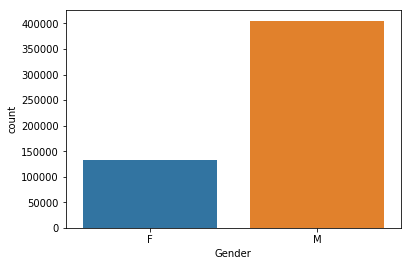

In [77]:
#plotting Male and female counting
sns.countplot(data['Gender'])

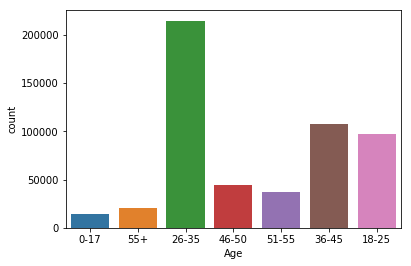

In [78]:
#plotting age distribution
sns.countplot(data['Age'])

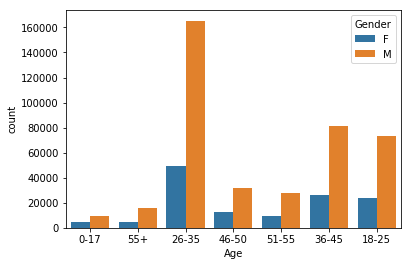

In [79]:
#Plotting age and gender distribution
sns.countplot(data['Age'],hue=data['Gender'])

# Let's go for ML model

In [63]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [64]:
data_1=data.copy()

In [65]:
data_1['Gender']=data_1['Gender'].map({'F':0,'M':1})
data_1['Age']=data_1['Age'].map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})
data_1['City_Category']=data_1['City_Category'].map({'A':0,'B':1,'C':2})
data_1['Stay_In_Current_City_Years']=data_1['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4':4,'4+':5})

In [66]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
y=data_1['Purchase']
x1=data_1.drop(['Purchase'],axis=1)

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,train_size=0.8,random_state=365)

C:\Users\Abu Zahid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [83]:
reg=LinearRegression()
reg.fit(x_train,y_train)

TypeError: float() argument must be a string or a number